# ABOUT


Datascientest's Datascientist continuous bootcamp - cohorte Mars2022 -  AeroBOT project

**Tutor**

* Alban THUET

**Authors:**

* [Ioannis STASINOPOULOS](https://www.linkedin.com/in/ioannis-stasinopoulos/)

</br>

---
</br>

**Version History**

Version | Date       | Author(s)  | Modification
--------|----------- | ---------  | --------------------------
1.0     | 23/10/2022 | I.S.       | Plot results BERT inference on FINAL test set, repeatability

# IMPORT PACKAGES


In [95]:
#######################
# Import packages
#######################
import numpy as np
import seaborn as sns
import math # for math.pi etc.
import time # time code execution

#######################
# Pandas
#######################
import pandas as pd
# Set pandas settings to show all data when using .head(), .columns etc.
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.set_option("display.colheader_justify","left") # left-justify the print output of pandas

### Display full columnwidth
# Set pandas settings to display full text columns
#pd.options.display.max_colwidth = None
# Restore pandas settings to display standard colwidth
pd.reset_option('display.max_colwidth')

import itertools # Pour créer des iterateurs

# Package to show the progression of pandas operations
from tqdm import tqdm
# from tqdm.auto import tqdm  # for notebooks

# Create new `pandas` methods which use `tqdm` progress
# (can use tqdm_gui, optional kwargs, etc.)
tqdm.pandas()
# simply use .progress_apply() instead of .apply() on your pd.DataFram

######################
# PLOTTING
######################
import matplotlib.pyplot as plt
%matplotlib inline


###############################
# Other
###############################
import pickle as pkl # Saving data externally

# LOAD DATA

## Mount GDrive

In [96]:
#@title
# Mount your Google Drive
from google.colab import drive
drive.mount('/content/drive/')

#check your present working directory 
%pwd

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


'/content/drive/My Drive/data/saved models/Yannis/BERT_final_test'

In [97]:
#@title
# move to the transformed data location (you can create a deeper structure, if needed, e.g. to save a trained model):
%cd /content/drive/MyDrive/data/transformed/

/content/drive/MyDrive/data/transformed


In [98]:
#@title
!ls # list the content of the pwd

#!ls "/content/drive/MyDrive/Data_Science/Formations/DataScienceTest/projet/AeroBot/" # list contect of a speficic folder

 2022_09_11_7_4_3_raw_narr_BERT_BASE_frozen_max_length_345.pkl
 complaints-2022-08-05_13_55.csv
'Copy of Qualified abbreviations_20220718.xlsx.gsheet'
'Data Dictionnary.xlsx'
 data_for_BERT_multilabel_20220805.pkl
 df_for_Anomaly_prediction.pkl
 df_test_for_Anomaly_prediction.pkl
 model.png
 model_results
 Narrative_PP_stemmed_24072022_TRAIN.pkl
 Narrative_Raw_Stemmed_24072022_TRAIN.pkl
 Narrative_RegEx_subst_21072022_TRAIN.pkl
'Qualified abbreviations_20220707_test.csv'
'Qualified abbreviations_20220708.csv'
'Qualified abbreviations_20220718.csv'
'Qualified abbreviations_20220718_Google_sheet.gsheet'
 test_data_final.pkl
 train_data_final.pkl


## Load MULTILABEL BERT DataFrames from .pkl files
- Multilabel classification report / word embedding options format
- Adapted for BERT experiments

In [99]:
def get_filenames_in_BERT_dir(dir, namepart, extension = '.pkl', include_path = False):
  '''
  - Search through all subfolders of dir and find all .pkl files 
  that correspond to the classification report in pandas.DataFrame format, 
  issued from BERT experiments. Use namepart = 'clf_rep_df'
  
  - Return a list with their full filenames
  
  Input: 
  ------
  - directory
  - namepart: string that should be contained in the filename. 'None' if not applicable
  - file extension type
  - include_path: whether to include the entire path in the filename; default: False
  
  Return:
  ------
  - list of .pkl filenames
  '''
  import os
  files_to_import = []
  # traverse whole directory
  for root, dirs, files in os.walk(dir):
      # select file name
      for file in files:
          # select only filenames containing 'namepart'
          if namepart != None:
            if namepart in str(file):
              # check the extension of files
              if file.endswith(extension):
                if include_path == True:
                  files_to_import.append(os.path.join(root, file)) # print whole path of files
                else:  
                  files_to_import.append(os.path.join('', file))
          
          else: # namepart = None
            # check the extension of files
              if file.endswith(extension):
                if include_path == True:
                  files_to_import.append(os.path.join(root, file)) # print whole path of files
                else:  
                  files_to_import.append(os.path.join('', file))

  return files_to_import

In [100]:
# Import DataFrames into a list 'files_to_import'
dir = '/content/drive/MyDrive/data/saved models/Yannis/BERT_final_test/'
%cd $dir
# the '$' extracts the value from the string. Don't put any comments in the line above

files_to_import = get_filenames_in_BERT_dir(dir, namepart = '_infer_FINAL_test_set_clf_rep_df', extension = '.pkl', include_path = True)
# include_path = True, because the files are located in different subfolders

print('\nFiles found:')
for filename in files_to_import:
  print(filename)

/content/drive/MyDrive/data/saved models/Yannis/BERT_final_test

Files found:
/content/drive/MyDrive/data/saved models/Yannis/BERT_final_test/2022_10_23_11_3_3_BERT_classes_reproduce_7_3_9_3/11_3_3_infer_FINAL_test_set_clf_rep_df.pkl
/content/drive/MyDrive/data/saved models/Yannis/BERT_final_test/2022_10_25_11_3_4_repeatability_test_of_11_3_3/11_3_4_infer_FINAL_test_set_clf_rep_df.pkl
/content/drive/MyDrive/data/saved models/Yannis/BERT_final_test/2022_10_25_11_3_5_repeatability_test2_of_11_3_3/11_3_5_infer_FINAL_test_set_clf_rep_df.pkl


In [101]:
#files_to_import = []
files_to_import.append('/content/drive/MyDrive/data/saved models/Yannis/BERT_final_test/2022_10_23_11_3_3_BERT_classes_reproduce_7_3_9_3/11_3_3_clf_rep_df.pkl')
files_to_import.append('/content/drive/MyDrive/data/saved models/Yannis/BERT_train/7_3_9_3_UNfrozen_2022_09_14/clf_rep_df_7_3_9_3_UNfrozen_2022_09_14.pkl')


# files_to_import.append('/content/drive/MyDrive/data/saved models/Yannis/BERT_train/7_3_9_3_UNfrozen_2022_09_14/clf_rep_df_7_3_9_3_UNfrozen_2022_09_14.pkl')
# files_to_import.append('/content/drive/MyDrive/data/saved models/Yannis/BERT_final_test/2022_10_25_11_3_4_repeatability_test_of_11_3_3/11_3_4_infer_FINAL_test_set_clf_rep_df.pkl')
# files_to_import.append('/content/drive/MyDrive/data/saved models/Yannis/BERT_final_test/2022_10_25_11_3_5_repeatability_test2_of_11_3_3/11_3_5_infer_FINAL_test_set_clf_rep_df.pkl')

In [102]:
# Combine all DataFrames into one, named 'model_results'
df_list = []

print(f"Files loaded:")
for filename in files_to_import:
  # Load the files
  with open(filename, "rb") as f:
    loaded_file = pkl.load(f)
    df_list.append(loaded_file) 
    print(filename, 'length:', len(loaded_file))

model_results_multilabel_BERT = pd.concat(df_list)
# Reset index, otherwise you get a repetition of 0,1,2,3
model_results_multilabel_BERT = model_results_multilabel_BERT.reset_index().drop(columns =['index'])

Files loaded:
/content/drive/MyDrive/data/saved models/Yannis/BERT_final_test/2022_10_23_11_3_3_BERT_classes_reproduce_7_3_9_3/11_3_3_infer_FINAL_test_set_clf_rep_df.pkl length: 56
/content/drive/MyDrive/data/saved models/Yannis/BERT_final_test/2022_10_25_11_3_4_repeatability_test_of_11_3_3/11_3_4_infer_FINAL_test_set_clf_rep_df.pkl length: 56
/content/drive/MyDrive/data/saved models/Yannis/BERT_final_test/2022_10_25_11_3_5_repeatability_test2_of_11_3_3/11_3_5_infer_FINAL_test_set_clf_rep_df.pkl length: 56
/content/drive/MyDrive/data/saved models/Yannis/BERT_final_test/2022_10_23_11_3_3_BERT_classes_reproduce_7_3_9_3/11_3_3_clf_rep_df.pkl length: 56
/content/drive/MyDrive/data/saved models/Yannis/BERT_train/7_3_9_3_UNfrozen_2022_09_14/clf_rep_df_7_3_9_3_UNfrozen_2022_09_14.pkl length: 56


In [103]:
# 11_3_3


In [104]:
# rename the 'values' column into '1'
model_results_multilabel_BERT = model_results_multilabel_BERT.rename(columns = {'values': '1'})

In [105]:
len(model_results_multilabel_BERT) / (len(df_list))

56.0

In [106]:
model_results_multilabel_BERT.head(5)

,metric,1,anomaly,preprocessing,classifier,undersampling,UNfrozen_layers,concat_layers,comments,experiment_ID
0,precision,0.810694,Anomaly_Deviation / Discrepancy - Procedural,original,BERT_BASE,0,"9,10,11,12",None,inference_on_FINAL_test_set,11_3_3
1,recall,0.769667,Anomaly_Deviation / Discrepancy - Procedural,original,BERT_BASE,0,"9,10,11,12",None,inference_on_FINAL_test_set,11_3_3
2,f1-score,0.789648,Anomaly_Deviation / Discrepancy - Procedural,original,BERT_BASE,0,"9,10,11,12",None,inference_on_FINAL_test_set,11_3_3
3,support,6343.000000,Anomaly_Deviation / Discrepancy - Procedural,original,BERT_BASE,0,"9,10,11,12",None,inference_on_FINAL_test_set,11_3_3
4,precision,0.907911,Anomaly_Aircraft Equipment,original,BERT_BASE,0,"9,10,11,12",None,inference_on_FINAL_test_set,11_3_3


In [107]:
# Sort BERT df according to model 'UNfrozen_layers','preprocessing','concat_layers' to display plots in 
model_results_multilabel_BERT = model_results_multilabel_BERT.sort_values(by = ['UNfrozen_layers','preprocessing','concat_layers'], ascending = False)

### Transform in Common format : 

In [108]:
# # Create a long label of the model by concatenating the various options into a string
# model_results_multilabel_BERT['model_label'] =                                                                       \
#                             + model_results_multilabel_BERT['experiment_ID']                                         \
#                             + '_' + model_results_multilabel_BERT['classifier']                                      \
#                             + '_' + model_results_multilabel_BERT['preprocessing']                                   \
#                             + '_' + 'UNfrozen_layers_' + model_results_multilabel_BERT['UNfrozen_layers']            \
#                             + '_' + 'concat_layers_'   + model_results_multilabel_BERT['concat_layers']              \
#                             + '_' + model_results_multilabel_BERT['comments']                                        \
# Create a long label of the model by concatenating the various options into a string
model_results_multilabel_BERT['approach']='BERT'

# Simplified model label where : "UNfrozen_layers_NO"  becomes "FROZEN"
model_results_multilabel_BERT['model_label'] =                                                                       \
                            + model_results_multilabel_BERT['experiment_ID']                                         \
                            + '_' + model_results_multilabel_BERT['classifier']                                      \
                            + '_' + model_results_multilabel_BERT['preprocessing']                                   \
                            + '_' + model_results_multilabel_BERT['UNfrozen_layers'].apply(lambda x: 'FROZEN' if x=='NO' else 'UNfrozen_layers_' +x) \
                            + '_' + 'concat_layers_'   + model_results_multilabel_BERT['concat_layers']              \
                            + '_' + model_results_multilabel_BERT['comments']                                        \

# Optional : We split BERT Classifier into FROZEN or UNFROZEN
model_results_multilabel_BERT['classifier']=model_results_multilabel_BERT['classifier'] + model_results_multilabel_BERT['UNfrozen_layers'].apply(lambda x : ' FROZEN' if x =='NO' else ' UNFROZEN') 

# Select the 
#select = model_results_multilabel_BERT[['model_label','anomaly','metric','1']]
model_results_multilabel_BERT_select = model_results_multilabel_BERT[['approach','model_label','classifier','preprocessing','undersampling','anomaly','metric','1']]

In [109]:
model_results = model_results_multilabel_BERT_select

In [110]:
model_results.head(10)

,approach,model_label,classifier,preprocessing,undersampling,anomaly,metric,1
224,BERT,7_3_9_3_BERT_BASE_raw_UNfrozen_layers_9_10_11_...,BERT_BASE UNFROZEN,raw,0,Anomaly_Aircraft Equipment,precision,0.881914
225,BERT,7_3_9_3_BERT_BASE_raw_UNfrozen_layers_9_10_11_...,BERT_BASE UNFROZEN,raw,0,Anomaly_Aircraft Equipment,recall,0.863162
226,BERT,7_3_9_3_BERT_BASE_raw_UNfrozen_layers_9_10_11_...,BERT_BASE UNFROZEN,raw,0,Anomaly_Aircraft Equipment,f1-score,0.872437
227,BERT,7_3_9_3_BERT_BASE_raw_UNfrozen_layers_9_10_11_...,BERT_BASE UNFROZEN,raw,0,Anomaly_Aircraft Equipment,support,7666.000000
228,BERT,7_3_9_3_BERT_BASE_raw_UNfrozen_layers_9_10_11_...,BERT_BASE UNFROZEN,raw,0,Anomaly_Airspace Violation,precision,0.734375
229,BERT,7_3_9_3_BERT_BASE_raw_UNfrozen_layers_9_10_11_...,BERT_BASE UNFROZEN,raw,0,Anomaly_Airspace Violation,recall,0.526119
230,BERT,7_3_9_3_BERT_BASE_raw_UNfrozen_layers_9_10_11_...,BERT_BASE UNFROZEN,raw,0,Anomaly_Airspace Violation,f1-score,0.613043
231,BERT,7_3_9_3_BERT_BASE_raw_UNfrozen_layers_9_10_11_...,BERT_BASE UNFROZEN,raw,0,Anomaly_Airspace Violation,support,804.000000
232,BERT,7_3_9_3_BERT_BASE_raw_UNfrozen_layers_9_10_11_...,BERT_BASE UNFROZEN,raw,0,Anomaly_ATC Issue,precision,0.766808
233,BERT,7_3_9_3_BERT_BASE_raw_UNfrozen_layers_9_10_11_...,BERT_BASE UNFROZEN,raw,0,Anomaly_ATC Issue,recall,0.684676


## Definition of the df to plot for BERT models

In [111]:
# Root label (source = ASRS coding forms) : order = by descending frequency
Anomaly_RootLabels=['Deviation / Discrepancy - Procedural',
                    'Aircraft Equipment',
                    'Conflict',
                    'Inflight Event / Encounter',
                    'ATC Issue',
                    'Deviation - Altitude',
                    'Deviation - Track / Heading',
                    'Ground Event / Encounter',
                    'Flight Deck / Cabin / Aircraft Event',
                    'Ground Incursion',
                    'Airspace Violation',
                    'Deviation - Speed',
                    'Ground Excursion',
                    'No Specific Anomaly Occurred']

In [112]:
# Dictionnary of old / new values of Anomaly labels 
dict_anomaly_label_ordered={}
for i,anomaly_rl in enumerate(Anomaly_RootLabels):
  col='Anomaly_' + anomaly_rl
  col_order=str(np.where(i+1<10,'0',''))+str(i+1)+'_'+ anomaly_rl
  dict_anomaly_label_ordered[col]=col_order

dict_anomaly_label_ordered

{'Anomaly_Deviation / Discrepancy - Procedural': '01_Deviation / Discrepancy - Procedural',
 'Anomaly_Aircraft Equipment': '02_Aircraft Equipment',
 'Anomaly_Conflict': '03_Conflict',
 'Anomaly_Inflight Event / Encounter': '04_Inflight Event / Encounter',
 'Anomaly_ATC Issue': '05_ATC Issue',
 'Anomaly_Deviation - Altitude': '06_Deviation - Altitude',
 'Anomaly_Deviation - Track / Heading': '07_Deviation - Track / Heading',
 'Anomaly_Ground Event / Encounter': '08_Ground Event / Encounter',
 'Anomaly_Flight Deck / Cabin / Aircraft Event': '09_Flight Deck / Cabin / Aircraft Event',
 'Anomaly_Ground Incursion': '10_Ground Incursion',
 'Anomaly_Airspace Violation': '11_Airspace Violation',
 'Anomaly_Deviation - Speed': '12_Deviation - Speed',
 'Anomaly_Ground Excursion': '13_Ground Excursion',
 'Anomaly_No Specific Anomaly Occurred': '14_No Specific Anomaly Occurred'}

In [113]:
# Definition of the df to plot : model_results_multilabel_BERT_select_toplot
model_results_multilabel_BERT_select_toplot=model_results_multilabel_BERT_select.copy()
model_results_multilabel_BERT_select_toplot['anomaly']=model_results_multilabel_BERT_select_toplot['anomaly'].replace(dict_anomaly_label_ordered)

In [114]:
model_results_multilabel_BERT.head(2)

,metric,1,anomaly,preprocessing,classifier,undersampling,UNfrozen_layers,concat_layers,comments,experiment_ID,approach,model_label
224,precision,0.881914,Anomaly_Aircraft Equipment,raw,BERT_BASE UNFROZEN,0,9_10_11_12,NO,last_hidden_state_CLS,7_3_9_3,BERT,7_3_9_3_BERT_BASE_raw_UNfrozen_layers_9_10_11_...
225,recall,0.863162,Anomaly_Aircraft Equipment,raw,BERT_BASE UNFROZEN,0,9_10_11_12,NO,last_hidden_state_CLS,7_3_9_3,BERT,7_3_9_3_BERT_BASE_raw_UNfrozen_layers_9_10_11_...


In [115]:
model_results_multilabel_BERT_select_toplot.head(2)

,approach,model_label,classifier,preprocessing,undersampling,anomaly,metric,1
224,BERT,7_3_9_3_BERT_BASE_raw_UNfrozen_layers_9_10_11_...,BERT_BASE UNFROZEN,raw,0,02_Aircraft Equipment,precision,0.881914
225,BERT,7_3_9_3_BERT_BASE_raw_UNfrozen_layers_9_10_11_...,BERT_BASE UNFROZEN,raw,0,02_Aircraft Equipment,recall,0.863162


In [116]:
df_temp1 = model_results_multilabel_BERT_select_toplot.replace({'11_3_3_BERT_BASE_original_UNfrozen_layers_9,10,11,12_concat_layers_None_last_hidden_state_CLS': 'train set', 
                                                                '11_3_3_BERT_BASE_original_UNfrozen_layers_9,10,11,12_concat_layers_None_inference_on_FINAL_test_set': 'final test set',
                                                                '7_3_9_3_BERT_BASE_raw_UNfrozen_layers_9_10_11_12_concat_layers_NO_last_hidden_state_CLS': '7_3_9_3',
                                                                '11_3_4_BERT_BASE_original_UNfrozen_layers_9,10,11,12_concat_layers_None_inference_on_FINAL_test_set': '11_3_4 final test set',
                                                                '11_3_5_BERT_BASE_original_UNfrozen_layers_9,10,11,12_concat_layers_None_inference_on_FINAL_test_set': '11_3_5 final test set'    
                                                                }
                                                               )

## Plot train set vs. Final test set, 11_3_3 only

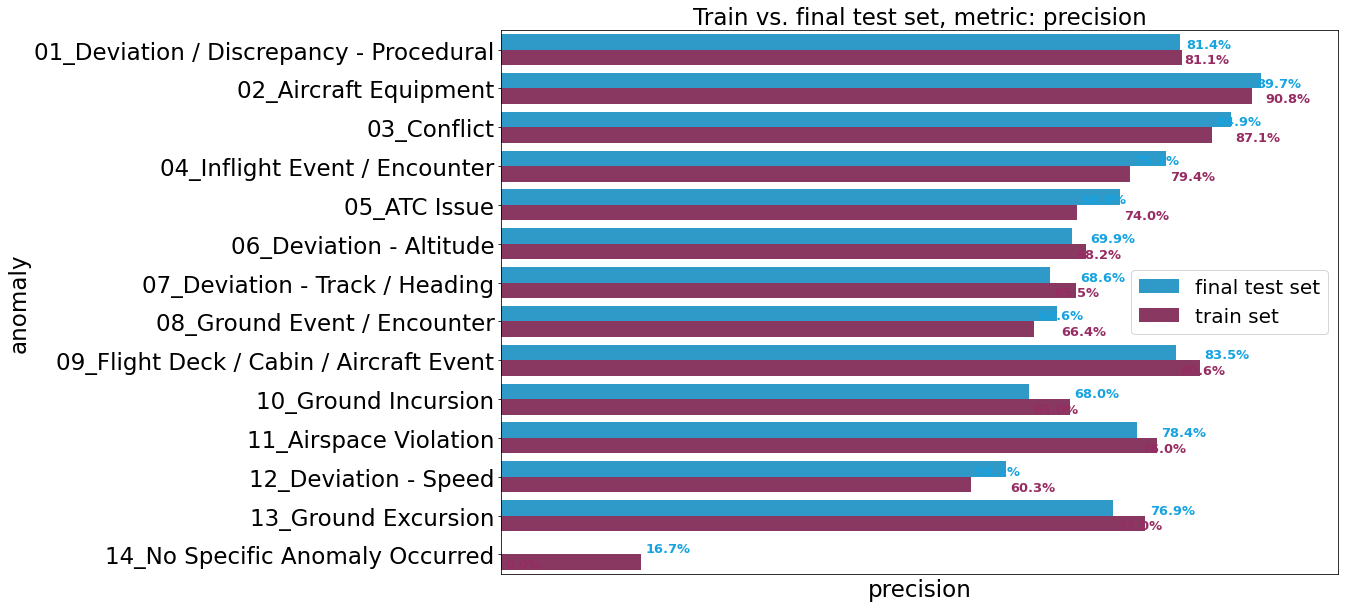

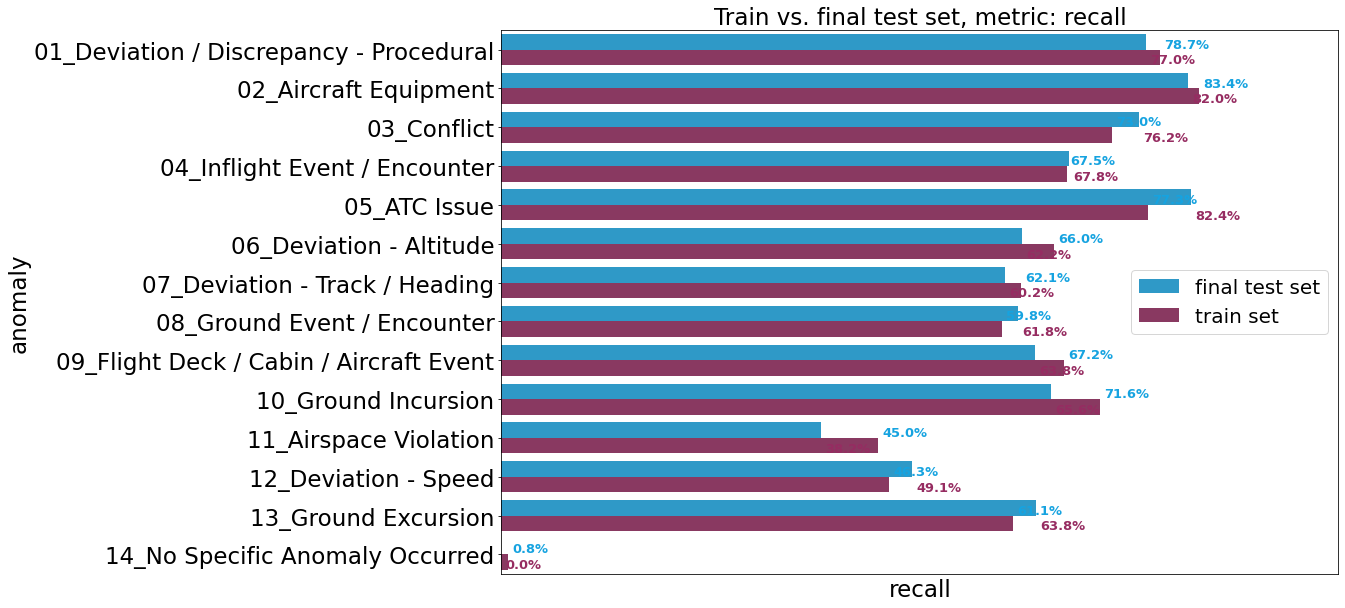

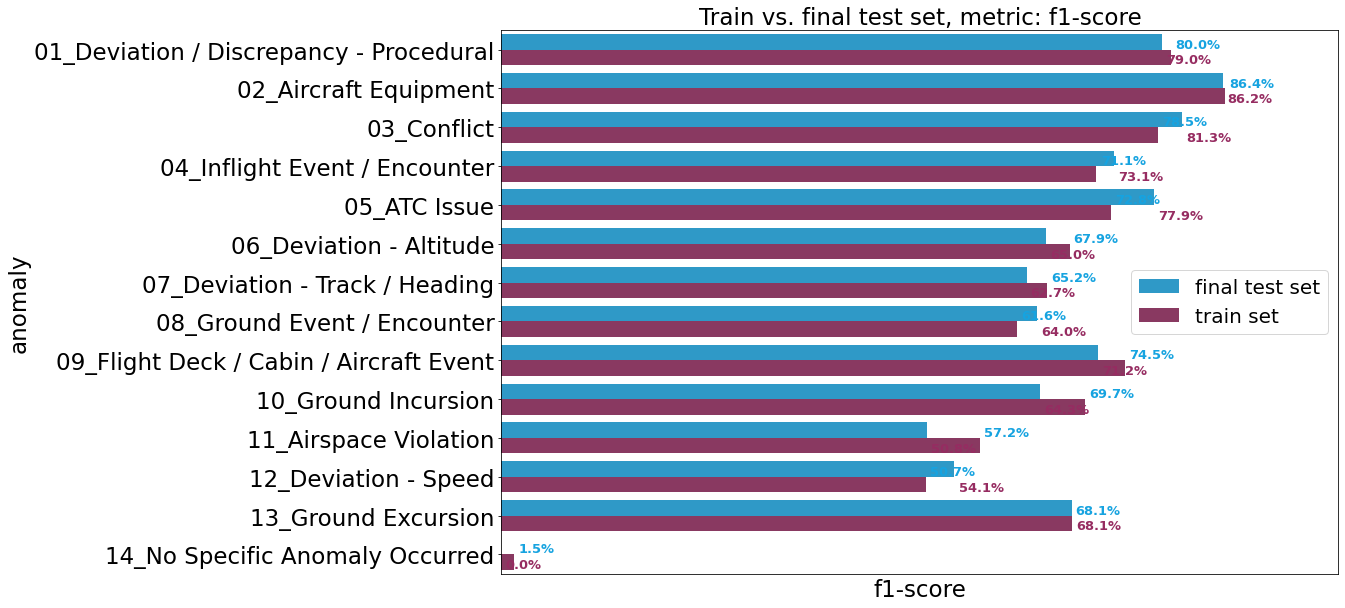

ValueError: ignored

<Figure size 1080x720 with 1 Axes>

In [117]:
import seaborn as sns

for metric in list(df_temp1['metric'].unique()):
  fig = plt.figure(figsize = (15,10))
  palette = sns.color_palette(["#16a3e0","#962c61"]) #gray: 766d6b

  df_for_barplot = df_temp1[(df_temp1['metric'] == metric) & (df_temp1['model_label'] != '7_3_9_3') & (df_temp1['model_label'] != '11_3_4 final test set') & (df_temp1['model_label'] != '11_3_5 final test set')]
  b = sns.barplot(data = df_for_barplot, x = '1', y = 'anomaly', 
                  hue = 'model_label',
                  palette = palette)

  # Train set
  df_temp = df_for_barplot[df_for_barplot['model_label'] == 'train set']
  for i, v in zip(range(len(df_temp['anomaly'])), df_temp['1']):
    plt.text(v+0.005, i-.05,           
            str(np.round(100*v,1))+'%', 
            color='#16a3e0', 
            va='baseline', 
            fontweight='bold',
            fontsize = 13)
    
  # Final test set  
  df_temp = df_for_barplot[df_for_barplot['model_label'] == 'final test set']
  for i, v in zip(range(len(df_temp['anomaly'])), df_temp['1']):
    plt.text(v+0.005, i+.1,       
            str(np.round(100*v,1))+'%', 
            color='#962c61', 
            va='top', 
            fontweight='bold',
            fontsize = 13)

  plt.rcParams['axes.titlesize'] = 23
  plt.rcParams['axes.labelsize'] = 23
  plt.rcParams['ytick.labelsize'] = 23
  plt.rc('legend', fontsize=20)    # legend fontsize

  b.legend_.set_title(None)
  plt.legend(loc='center right')
  plt.xlim([0,1])
  plt.xticks([])
  plt.xlabel(metric)
  plt.title(f'Train vs. final test set, metric: {metric}');

## Repeatability - part 1- Plot 7_3_9_3 vs. 11_3_3

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1851: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, val, pi)


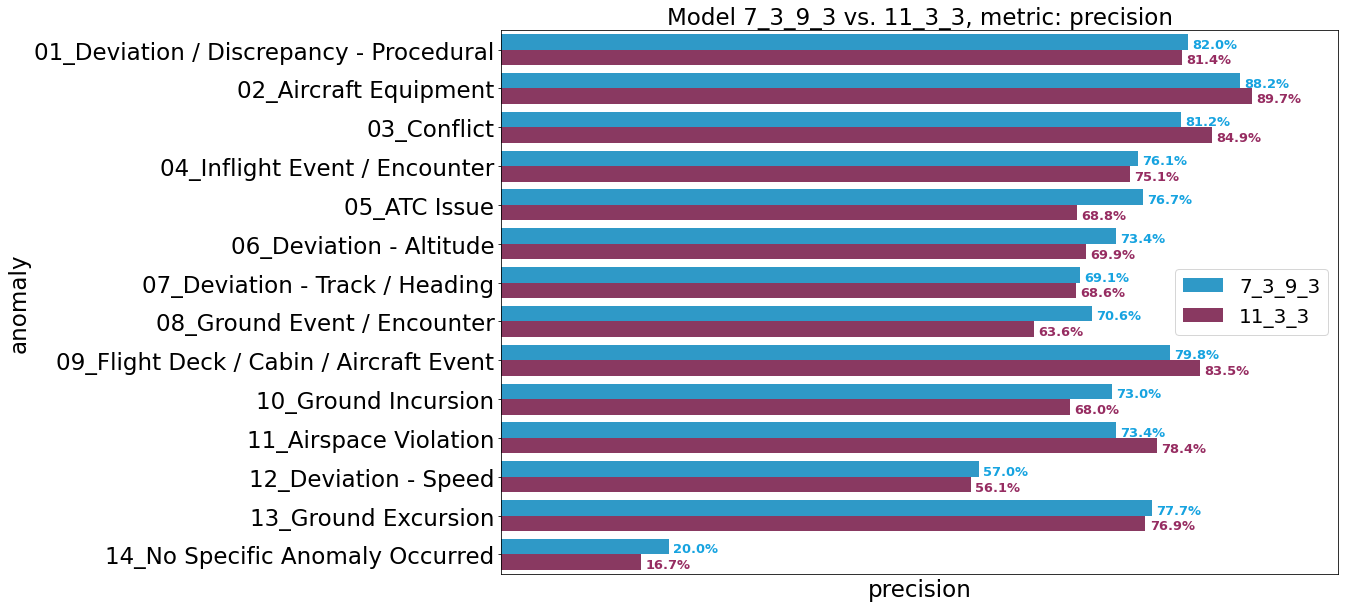

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1851: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, val, pi)


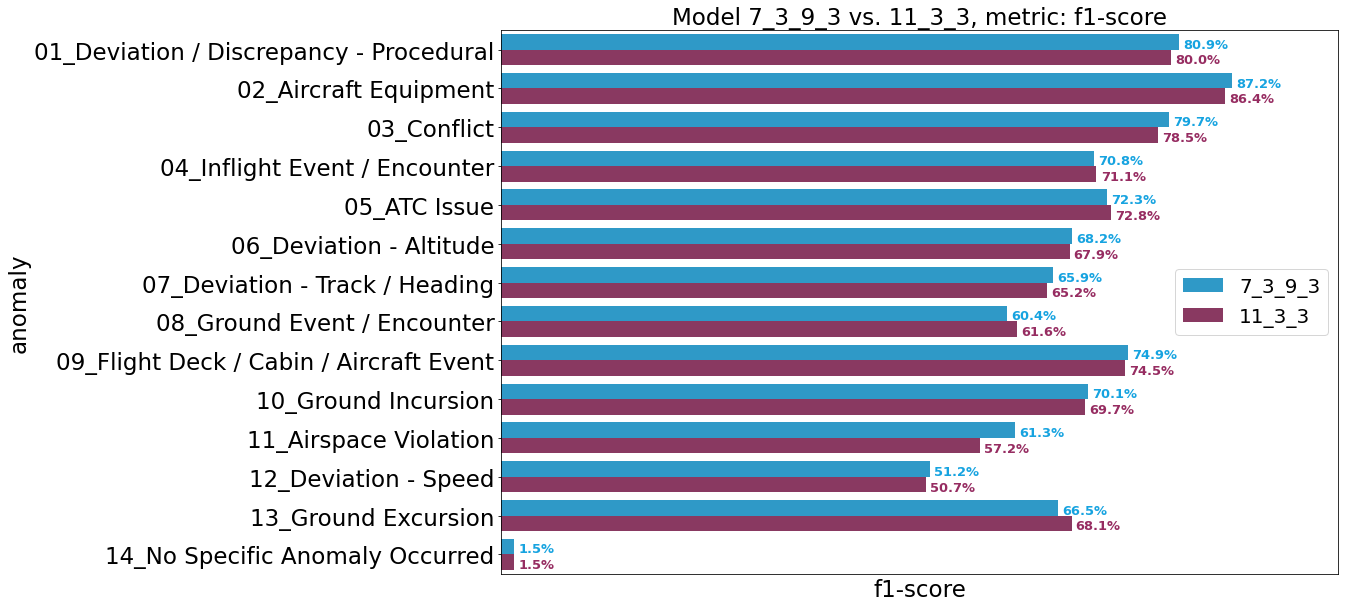

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1851: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, val, pi)


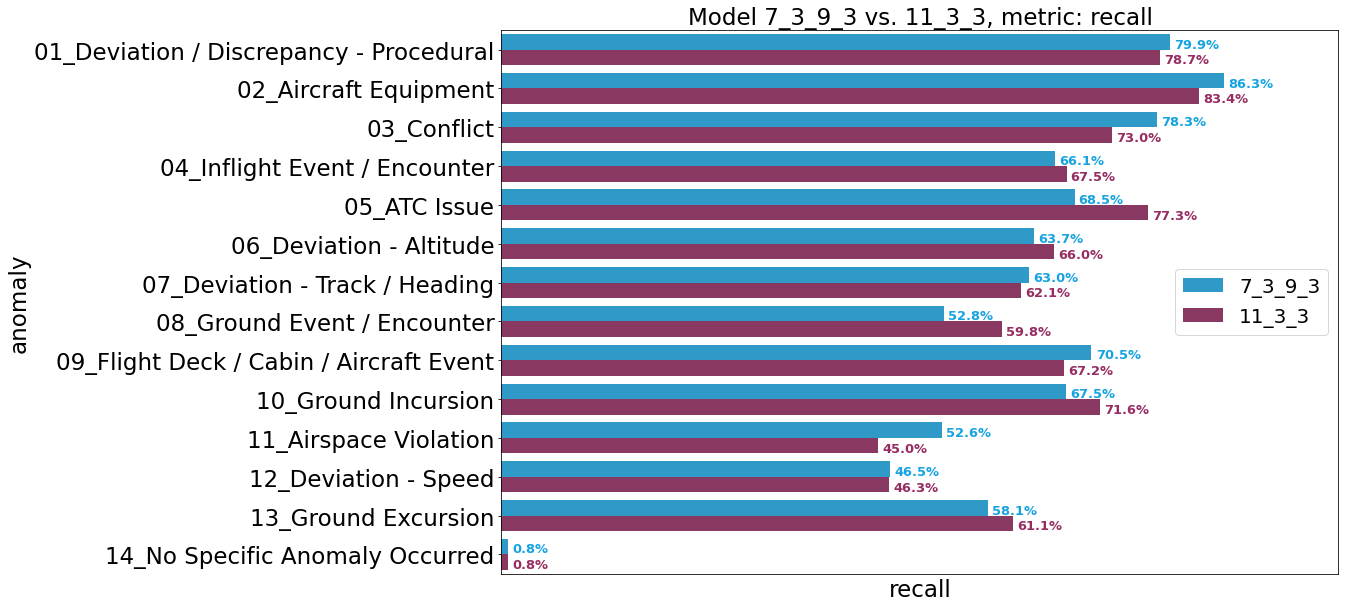

In [118]:
import seaborn as sns

for metric in ['precision', 'f1-score', 'recall']:
  fig = plt.figure(figsize = (15,10))
  palette = sns.color_palette(["#16a3e0","#962c61"]) #gray: 766d6b # green: #6aa84f

  df_for_barplot = df_temp1[(df_temp1['metric'] == metric) & (df_temp1['model_label'] != 'final test set')& (df_temp1['model_label'] != '11_3_4 final test set') & (df_temp1['model_label'] != '11_3_5 final test set')]
  df_for_barplot.iloc[:14] = df_for_barplot[:14].sort_values('anomaly')
  df_for_barplot = df_for_barplot.replace({'train set': '11_3_3'})

  b = sns.barplot(data = df_for_barplot, x = '1', y = 'anomaly', 
                  hue = 'model_label',
                  palette = palette)

  # Train set
  df_temp = df_for_barplot[df_for_barplot['model_label'] == '7_3_9_3']
  for i, v in zip(range(len(df_temp['anomaly'])), df_temp['1']):
    plt.text(v+0.005, i-.05,           
            str(np.round(100*v,1))+'%', 
            color='#16a3e0', 
            va='baseline', 
            fontweight='bold',
            fontsize = 13)
    
  # Final test set  
  df_temp = df_for_barplot[df_for_barplot['model_label'] == '11_3_3']
  for i, v in zip(range(len(df_temp['anomaly'])), df_temp['1']):
    plt.text(v+0.005, i+.1,       
            str(np.round(100*v,1))+'%', 
            color='#962c61', 
            va='top', 
            fontweight='bold',
            fontsize = 13)

  plt.rcParams['axes.titlesize'] = 23
  plt.rcParams['axes.labelsize'] = 23
  plt.rcParams['ytick.labelsize'] = 23
  plt.rc('legend', fontsize=20)    # legend fontsize

  b.legend_.set_title(None)
  plt.legend(loc='center right')
  plt.xlim([0,1])
  plt.xticks([])
  plt.xlabel(metric)
  plt.title(f'Model 7_3_9_3 vs. 11_3_3, metric: {metric}')
  plt.show();

# 11_3_3 only - for probability distribution discussion

In [119]:
df_temp1['model_label'].unique()

array(['7_3_9_3', 'final test set', '11_3_4 final test set',
       '11_3_5 final test set', 'train set'], dtype=object)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1851: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, val, pi)


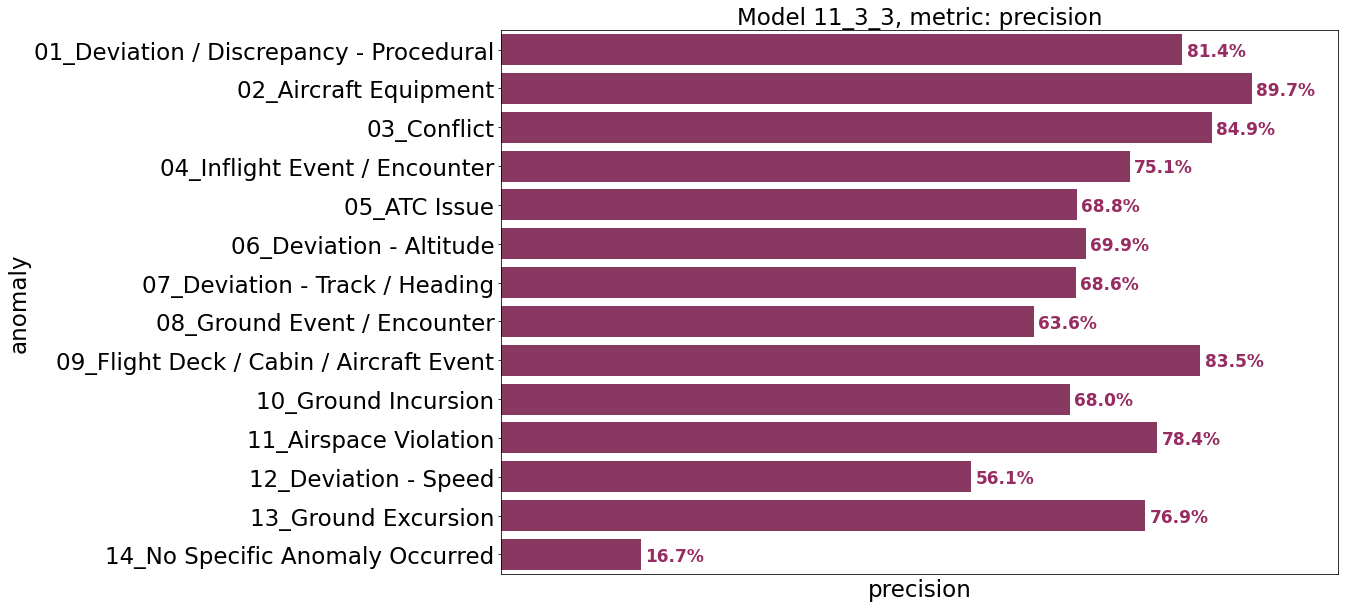

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1851: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, val, pi)


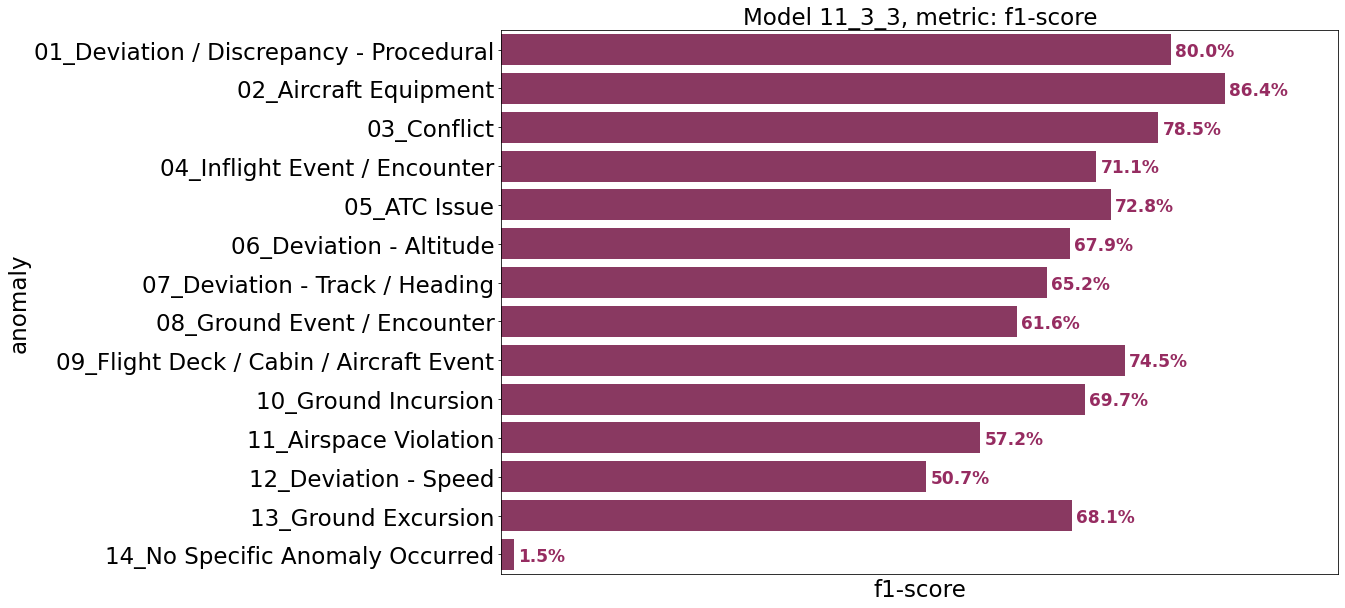

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1851: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, val, pi)


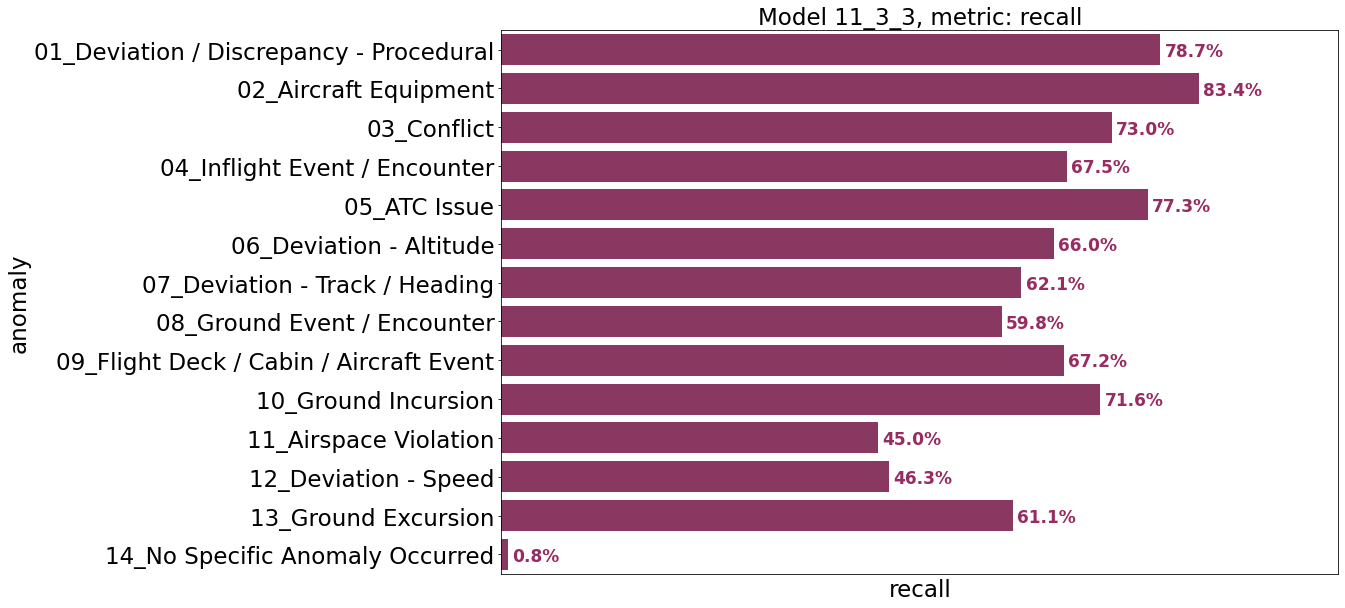

In [120]:
import seaborn as sns

for metric in ['precision', 'f1-score', 'recall']:
  fig = plt.figure(figsize = (15,10))
  palette = sns.color_palette(["#962c61"]) #gray: 766d6b # green: #6aa84f blue: #16a3e0

  df_for_barplot = df_temp1[
      (df_temp1['metric'] == metric) 
      & (df_temp1['model_label'] != 'final test set')
      & (df_temp1['model_label'] != '11_3_4 final test set') 
      & (df_temp1['model_label'] != '11_3_5 final test set')
      & (df_temp1['model_label'] != '7_3_9_3')
      ]


  df_for_barplot.iloc[:14] = df_for_barplot[:14].sort_values('anomaly')
  df_for_barplot = df_for_barplot.replace({'train set': '11_3_3'})

  b = sns.barplot(data = df_for_barplot, x = '1', y = 'anomaly', 
                  hue = 'model_label',
                  palette = palette)
    
  # Final test set  
  df_temp = df_for_barplot[df_for_barplot['model_label'] == '11_3_3']
  for i, v in zip(range(len(df_temp['anomaly'])), df_temp['1']):
    plt.text(v+0.005, i-0.2,       
            str(np.round(100*v,1))+'%', 
            color='#962c61', 
            va='top', 
            fontweight='bold',
            fontsize = 17)

  plt.rcParams['axes.titlesize'] = 23
  plt.rcParams['axes.labelsize'] = 23
  plt.rcParams['ytick.labelsize'] = 23
  plt.rc('legend', fontsize=20)    # legend fontsize

  # b.legend_.set_title(None)
  # plt.legend(loc='center right')
  plt.legend([],[], frameon=False) # suppress the legend
  plt.xlim([0,1])
  plt.xticks([])
  plt.xlabel(metric)
  plt.title(f'Model 11_3_3, metric: {metric}')
  plt.show();

## Repeatability - part 2: Plot Final test set, 11_3_3, 11_3_4, 11_3_5 
11_3_4, 11_3_5 are **identical** retrainings of 11_3_3

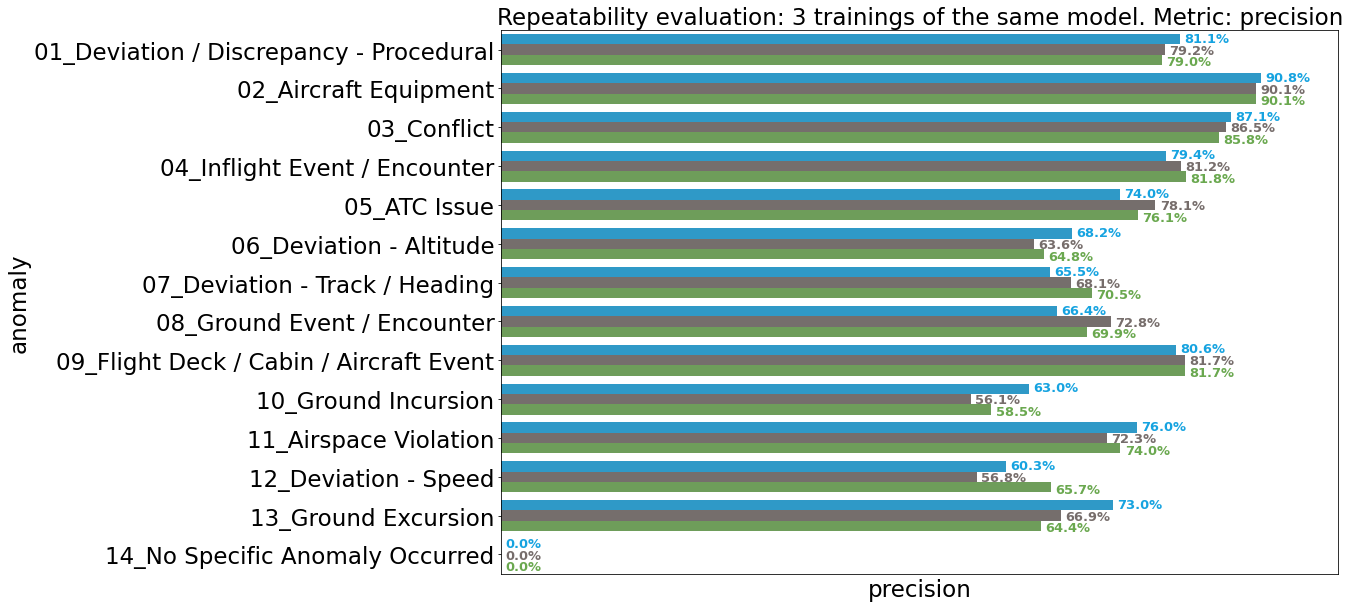

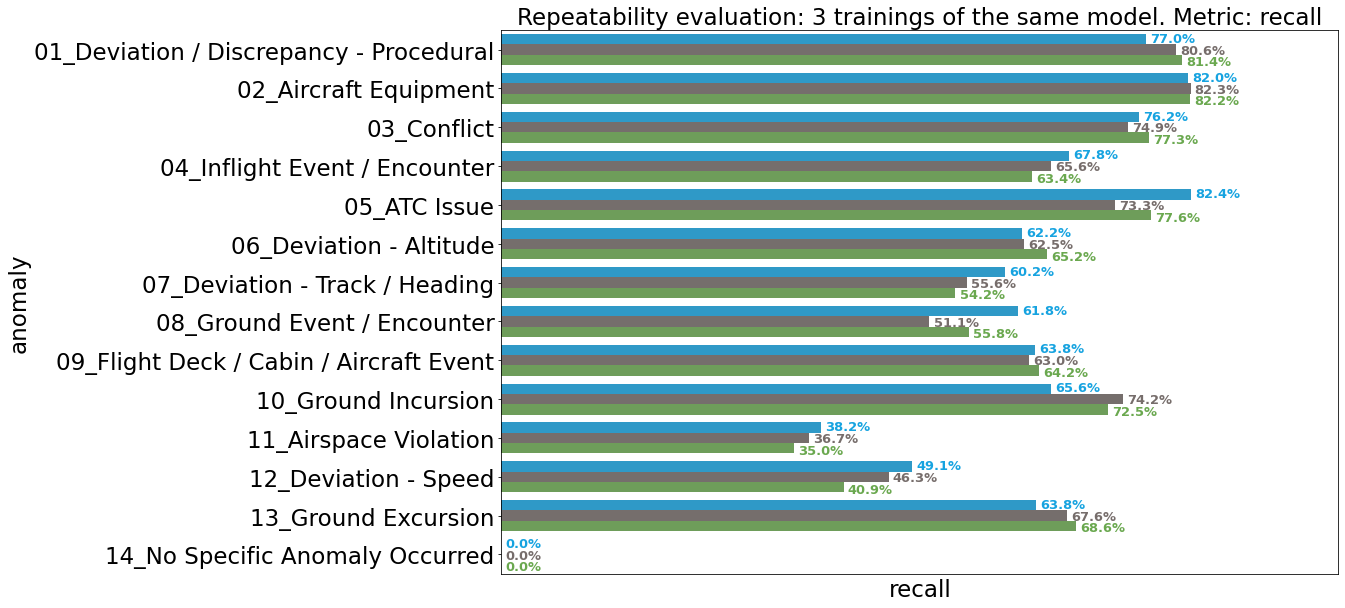

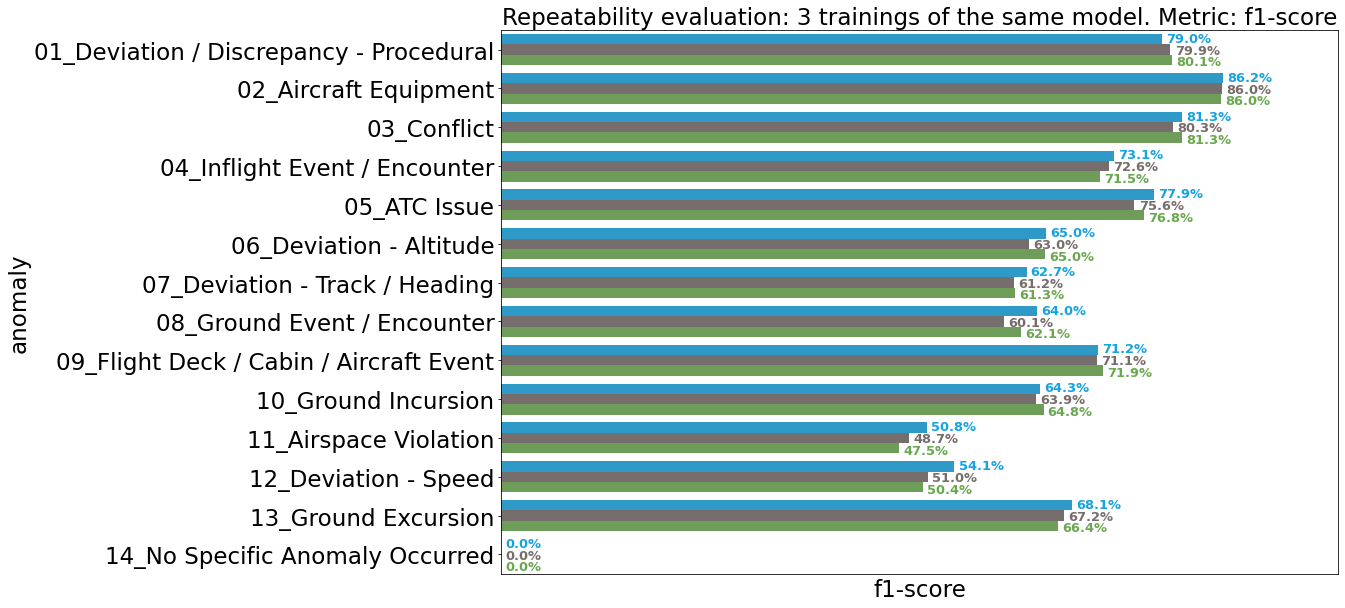

ValueError: ignored

<Figure size 1080x720 with 1 Axes>

In [121]:
import seaborn as sns

for metric in list(df_temp1['metric'].unique()):
  fig = plt.figure(figsize = (15,10))
  palette = sns.color_palette(["#16a3e0","#766d6b", '#6aa84f']) #gray: 766d6b red: 962c61

  df_for_barplot = df_temp1[(df_temp1['metric'] == metric) & (df_temp1['model_label'] != '7_3_9_3') & (df_temp1['model_label'] != 'train set')]
  b = sns.barplot(data = df_for_barplot, x = '1', y = 'anomaly', 
                  hue = 'model_label',
                  palette = palette)

  # 11_3_3
  df_temp = df_for_barplot[df_for_barplot['model_label'] == 'final test set']
  for i, v in zip(range(len(df_temp['anomaly'])), df_temp['1']):
    plt.text(v+0.005, i-0.2,           
            str(np.round(100*v,1))+'%', 
            color='#16a3e0', 
            va='baseline', 
            fontweight='bold',
            fontsize = 13)
    
  # 11_3_4
  df_temp = df_for_barplot[df_for_barplot['model_label'] == '11_3_4 final test set']
  for i, v in zip(range(len(df_temp['anomaly'])), df_temp['1']):
    plt.text(v+0.005, i-0.15,       
            str(np.round(100*v,1))+'%', 
            color='#766d6b', 
            va='top', 
            fontweight='bold',
            fontsize = 13)
    
  # 11_3_5
  df_temp = df_for_barplot[df_for_barplot['model_label'] == '11_3_5 final test set']
  for i, v in zip(range(len(df_temp['anomaly'])), df_temp['1']):
    plt.text(v+0.005, i+0.15,       
            str(np.round(100*v,1))+'%', 
            color='#6aa84f', 
            va='top', 
            fontweight='bold',
            fontsize = 13)

  plt.rcParams['axes.titlesize'] = 23
  plt.rcParams['axes.labelsize'] = 23
  plt.rcParams['ytick.labelsize'] = 23
  plt.rc('legend', fontsize=20)    # legend fontsize

  b.legend_.set_title(None)
  plt.legend(loc='center right')
  b.legend().set_visible(False)
  plt.xlim([0,1])
  plt.xticks([])
  plt.xlabel(metric)
  plt.title(f'Repeatability evaluation: 3 trainings of the same model. Metric: {metric}');